<a href="https://colab.research.google.com/github/prachi-ai/Digit_Recognition/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np


In [ ]:
!unzip '/content/Train_UQcUa52 (1).zip'

Archive:  /content/Train_UQcUa52 (1).zip
replace Images/test/49000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
X = df.filename
Y = df.label

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
X_data = []
for name in X:
  path = "/content/Images/train/"+name
  i = mpimg.imread(path)
  X_data.append(i)
np.array(X_data[112]).shape


(28, 28, 4)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.20)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
#x_train.reshape(-1,1)
x_train.shape
#plt.imshow(np.round(x_train[115]))

(39200, 28, 28, 4)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API

#x_train = x_train.reshape(x_train.shape[0], 56, 56, 1)
#x_test = x_test.reshape(x_test.shape[0], 56, 56, 1)
input_shape = (28, 28, 4)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (39200, 28, 28, 4)
Number of images in x_train 39200
Number of images in x_test 9800


In [ ]:
# Importing the required Keras modules containing model and layers
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=20)

Epoch 1/20
39200/39200 [==============================] - 27s 691us/step - loss: 0.0336 - accuracy: 0.9891
Epoch 2/20
39200/39200 [==============================] - 27s 677us/step - loss: 0.0282 - accuracy: 0.9907
Epoch 3/20
39200/39200 [==============================] - 27s 691us/step - loss: 0.0244 - accuracy: 0.9918
Epoch 4/20
39200/39200 [==============================] - 27s 684us/step - loss: 0.0292 - accuracy: 0.9909
Epoch 5/20
39200/39200 [==============================] - 27s 682us/step - loss: 0.0221 - accuracy: 0.9925
Epoch 6/20
39200/39200 [==============================] - 29s 750us/step - loss: 0.0232 - accuracy: 0.9931
Epoch 7/20
39200/39200 [==============================] - 26s 675us/step - loss: 0.0219 - accuracy: 0.9927
Epoch 8/20
39200/39200 [==============================] - 26s 672us/step - loss: 0.0243 - accuracy: 0.9919
Epoch 9/20
39200/39200 [==============================] - 27s 681us/step - loss: 0.0196 - accuracy: 0.9935
Epoch 10/20
39200/39200 [============

In [ ]:
model.evaluate(x_test, y_test)

9800/9800 [==============================] - 2s 225us/step


[0.1390513840881393, 0.9819387793540955]

The predicted label: 9


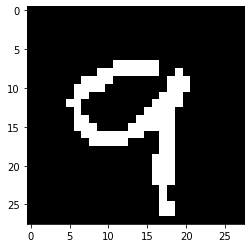

In [ ]:
image_index = 4924
plt.imshow(np.round(x_test[image_index]),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 4))
print('The predicted label:', pred.argmax())

In [ ]:
solution = pd.read_csv('/content/test.csv')
valid = solution.filename
valid[0]

'49000.png'

In [ ]:
X_valid = []
for name in valid:
  path = '/content/Images/test/'+name
  i = mpimg.imread(path)
  X_valid.append(i)

In [ ]:
label = []
for img in X_valid:
  label_pred = model.predict(img.reshape(1, 28, 28, 4))
  label.append(label_pred.argmax())
  



In [ ]:
solution["label"]=label
solution.head

<bound method NDFrame.head of         filename  label
0      49000.png      4
1      49001.png      0
2      49002.png      9
3      49003.png      7
4      49004.png      9
...          ...    ...
20995  69995.png      9
20996  69996.png      2
20997  69997.png      6
20998  69998.png      6
20999  69999.png      2

[21000 rows x 2 columns]>

In [ ]:
solution.to_csv("solution1.csv")